# Carga de cartografías en Python
Antes de comenzar es conveninte, aunque no estrictamente necesario, crear un nuevo entorno para instalar las librerías espaciales con sus dependencias

In [1]:
# Podemos Crear un nuevo entorno de trabajo (mejor desde el terminal)
#! conda create -n geo_env
#! conda activate geo_env
#! conda config --env --add channels conda-forge
#! conda config --env --set channel_priority strict

# conda install --channel conda-forge geopandas

Las principales librerías para trabajar con cartografías y datos espaciales son:
- `geopandas` para trabajar con datos espaciales. Trabaja con GeoDataFrame o geotablas, que es un dataframe donde cada fila corresponde a una figura geométrica, cada columna es un metadato y con una columna final con la geometría, puntos (x,y) que hay que unir para definir cada figura espacial (sigue la estructura de "simple features" utilizada también en postgis o `sf` de R)   
- `xarray` para datos espaciales raster, que representan superficies mediante cuadrículas. Trabaja con objetos DataArrays donde cada elemento tiene una coordenada (x,y) que correpnde a una celda. Yo en esta clase no trabajaré con estos datos raster. Para más información de como trabajar con datos raster, y lo más importante, de como poder convertirlos en datos tabulares tipo GeoDataFrame para poder aplicar todas las librerías de sci-kit.learn (por ejemplo) para hacer machine learning véase [Geographic Data Science with Python](https://geographicdata.science/book/intro.html)

<br>

- Para hacer el análisis estadístico espacial utilizaremos la librería **`PySal`**. Sobre esta librería hablaremos un poco más adelante, pero si alguien está interesado puede consultar [pysal.org](https://pysal.org/)
- para gestionar cartografías, fusionar unir, crear zonas, etc puede utilizarse  la librería **`Shapely`**. No voy a verla, [Shapely](https://shapely.readthedocs.io/en/stable/index.html)


Cargamos la librería `geopandas`

Para una introducción a esta librería es muy recomendable visitar su web [GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html) y otras librerías que también utilizaremos

In [2]:
import geopandas as gpd

import pandas as pd
import matplotlib.pyplot as plt


`GeoPandas` extiende la librería `Pandas` para que pueda trabajar con datos espaciales. La estructura de datos principal en `GeoPandas` es `geopandas.GeoDataFrame`, una subclase de `pandas.DataFrame`, que puede almacenar columnas de geometría y realizar operaciones espaciales. El `geopandas.GeoSeries`, una subclase de `pandas.Series`, que incorpora las geometrías de cada punto, linea o polígono espacias. Por lo tanto, un `GeoDataFrame` es una combinación de `pandas.Series`, con datos tradicionales (numéricos, booleanos, texto, etc.), y `geopandas.GeoSeries`, con geometrías (puntos, polígonos, etc.).    

Cada `GeoSeries` contiene una geometría y tiene el atributo `GeoSeries.crs`, la cual almacena información sobre la proyección utilizada en la geometría (CRS son las siglas en inglés de **Coordinate Reference System**)

## Lectura de Ficheros de Cartografías

La lectura de los ficheros con las cartografías, que incluyen metadatos de cada objeto espacial y su geometría (por ejemplo, GeoPackage, GeoJSON, Shapefile), se realiza utilizando `geopandas.read_file()`, que detecta automáticamente el tipo de archivo y crea un `GeoDataFrame`

In [3]:
gdf =gpd.read_file("cartografias/CCAA_GEO_ETRS89.shp")
gdf.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SP_ID     19 non-null     object  
 1   id        19 non-null     object  
 2   cod_CCAA  19 non-null     object  
 3   geometry  19 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 736.0+ bytes


<AxesSubplot: >

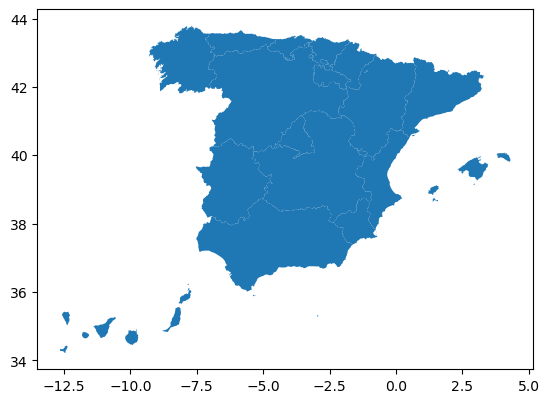

In [4]:
gdf.plot()

In [5]:
gdf

,SP_ID,id,cod_CCAA,geometry
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631..."
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431..."
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796..."
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7..."
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ..."
5,CA06,CA06,CA06,"MULTIPOLYGON (((-4.83975 43.18265, -4.83570 43..."
6,CA07,CA07,CA07,"MULTIPOLYGON (((-2.92843 42.61309, -2.92825 42..."
7,CA08,CA08,CA08,"MULTIPOLYGON (((-2.05037 41.14872, -2.04629 41..."
8,CA09,CA09,CA09,"MULTIPOLYGON (((0.66149 42.69284, 0.66601 42.6..."
9,CA10,CA10,CA10,"MULTIPOLYGON (((0.51654 40.52477, 0.51478 40.5..."


La geometría puede ser de tipo Punto, Líneas o polígonos espaciales (simple features). Cada figura espacial (feature, !!!ojo que en machine learning feature sería cada variable o característica,columna, correspondiente a cada unidad, a cada fila, pero aquí feature es un objeto espacial, una unidad de observación o una fila!!!! ).    
    
    ... como digo cada objeto, unidad o figura espacial puede estar compuesta por ejemplo por un único polígono, como el caso de Asturias

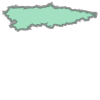

In [6]:
gdf["geometry"][2]


o como conjunto de polígonos o Multipolígonos, como el caso de las Islas Canarias

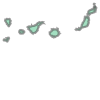

In [7]:
gdf["geometry"][4]

En este caso la cartografía venía vacía, sin metadatos, podemos ir añadiendo sólo algunas variables que podemos obtener de la propia geometría, como el área total de cada CCAA,o su centroide

In [8]:
gdf["area"] = gdf.area

C:\Users\loren\AppData\Local\Temp\ipykernel_6356\719349870.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


In [9]:
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631...",8.922890
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431...",5.148104
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796...",1.176132
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7...",0.523204
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ...",0.728376


Para el calculo del área es necesario tener bien definido el sistema de referencia, la proyección que se está utilizando para la localización de los diferentes elementos del mapa que estamos representando (los polígonos de las Comunidades Autónomas)
Es posible que os aparezca un warning referente a estas proyecciones utilizadas en las geometrías. En este caso yo he bajado los datos cartográficos del INE (EPSG:4258)

Para consultar características de cada sistema de referencia
[http://epsg.io]
[http://spatialreference.org]
CRS("epsg:3857") #PSeudomercator Este es el que usa Open Street Maps
http://spatialreference.org/ref/epsg/3857/
Projection used in many popular web mapping applications (Google/Bing/OpenStreetMap/etc). Sometimes known as EPSG:900913.
EPSG:4326 WGS 84

  

In [10]:
gdf.crs


<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - ETRS89
- bounds: (-16.1, 32.88, 40.18, 84.17)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
# Podría fijar la cartografía en otro sistema de referencia:
# gdf=gdf.to_crs(epsg=3857) # este epsg=3857 Pseudo-Mercator -- Spherical Mercator es el que utilizan Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI

Calculo ahora el centroide de cada CCAA y lo guardo como otra columna adicional en mi datagrame

In [12]:
gdf['centroide'] = gdf.centroid

C:\Users\loren\AppData\Local\Temp\ipykernel_6356\3882760418.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroide'] = gdf.centroid


In [13]:
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area,centroide
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631...",8.922890,POINT (-4.57448 37.46515)
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431...",5.148104,POINT (-0.65864 41.52137)
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796...",1.176132,POINT (-5.99206 43.29426)
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7...",0.523204,POINT (2.91375 39.57567)
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ...",0.728376,POINT (-10.04040 35.04767)


O podemos calcular la distancia a un punto (por ejemplo al centroide de Madrid CA13)

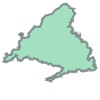

In [14]:
gdf["geometry"][12]

In [15]:
Madrid_point = gdf['centroide'].iloc[12]
gdf['distancia'] = gdf['centroide'].distance(Madrid_point)


C:\Users\loren\AppData\Local\Temp\ipykernel_6356\973057106.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distancia'] = gdf['centroide'].distance(Madrid_point)


In [16]:
gdf

,SP_ID,id,cod_CCAA,geometry,area,centroide,distancia
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631...",8.922890,POINT (-4.57448 37.46515),3.151160
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431...",5.148104,POINT (-0.65864 41.52137),3.224215
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796...",1.176132,POINT (-5.99206 43.29426),3.606316
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7...",0.523204,POINT (2.91375 39.57567),6.693294
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ...",0.728376,POINT (-10.04040 35.04767),8.348426
5,CA06,CA06,CA06,"MULTIPOLYGON (((-4.83975 43.18265, -4.83570 43...",0.589368,POINT (-4.02866 43.19940),2.720381
6,CA07,CA07,CA07,"MULTIPOLYGON (((-2.92843 42.61309, -2.92825 42...",10.201304,POINT (-4.78068 41.75627),1.649090
7,CA08,CA08,CA08,"MULTIPOLYGON (((-2.05037 41.14872, -2.04629 41...",8.331317,POINT (-3.00339 39.58295),1.158956
8,CA09,CA09,CA09,"MULTIPOLYGON (((0.66149 42.69284, 0.66601 42.6...",3.479227,POINT (1.53013 41.80045),5.405445
9,CA10,CA10,CA10,"MULTIPOLYGON (((0.51654 40.52477, 0.51478 40.5...",2.432325,POINT (-0.55344 39.40330),3.346193


### Podemos hacer gráficos de cloropletas estáticos (aquí los colores están en función del área)

<AxesSubplot: >

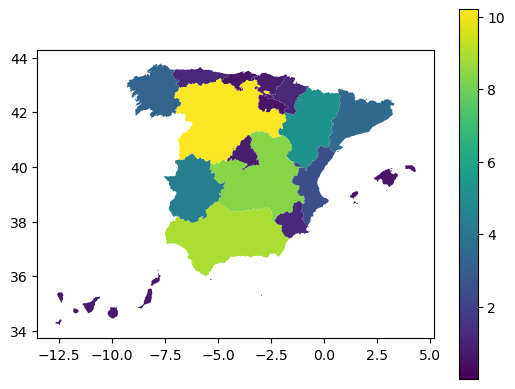

In [17]:
gdf.plot("area", legend=True)

Es muy importante la paleta de colores, que las tonalidades muestren claramente una relación entre intensidad y valores de las variables [Paletas de Colores en matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


<AxesSubplot: >

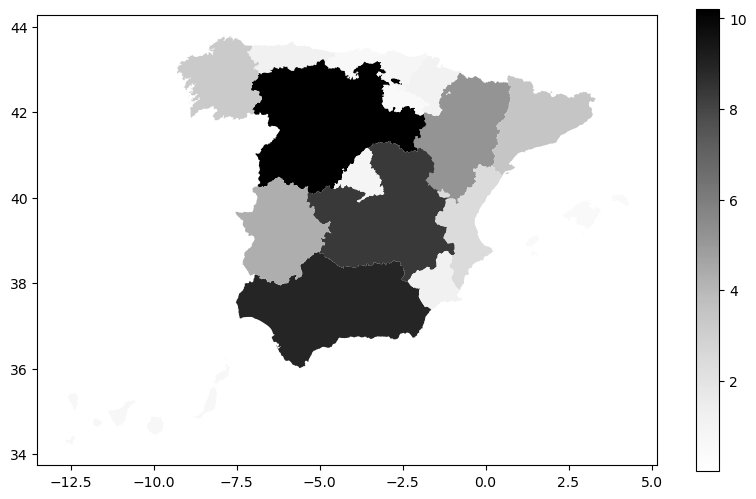

In [18]:
gdf.plot("area", legend=True, cmap='Greys', figsize=(10,6))

<AxesSubplot: >

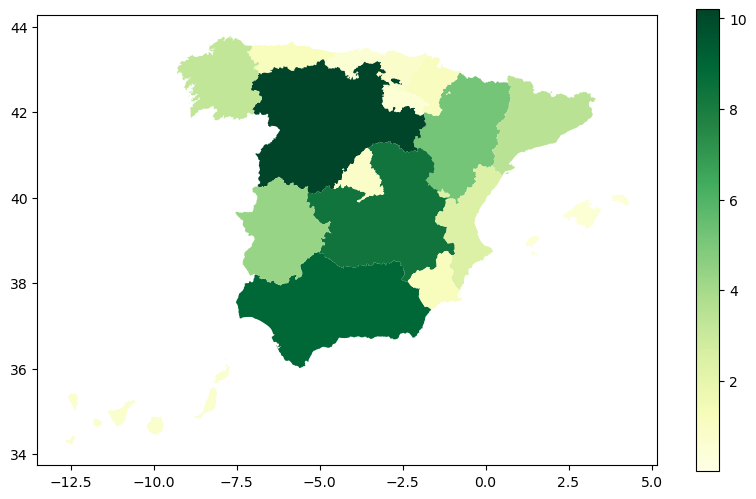

In [19]:
gdf.plot("area", legend=True, cmap='YlGn', figsize=(10,6))

In [20]:
# o dinámicos (requiere la librería folium, comprobar todos los atributos de geopandas con print(dir(gpd)) debe estar explore. Si no está intalar la última versión conda install --channel conda-forge geopandas==0.12.2)
gdf.explore("area", legend=False)

In [21]:

print(dir(gpd))


['GeoDataFrame', 'GeoSeries', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_compat', '_config', '_decorator', '_vectorized', '_version', 'array', 'base', 'clip', 'datasets', 'explore', 'geodataframe', 'geopandas', 'geoseries', 'gpd', 'io', 'np', 'options', 'overlay', 'pd', 'plotting', 'points_from_xy', 'read_feather', 'read_file', 'read_parquet', 'read_postgis', 'show_versions', 'sindex', 'sjoin', 'sjoin_nearest', 'tools']


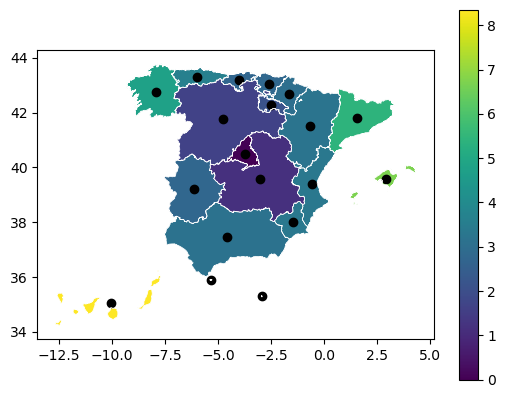

In [22]:
# podemos dibujar las fronteras y los centroides como si fueran capas

map=gdf.plot("distancia", legend=True)
map=gdf.boundary.plot(ax=map, color="white", linewidth=.5)
map=gdf["centroide"].plot(ax=map, color="black")

Podemos cambiar la paleta de colores   [Paletas de Colores en matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


<AxesSubplot: >

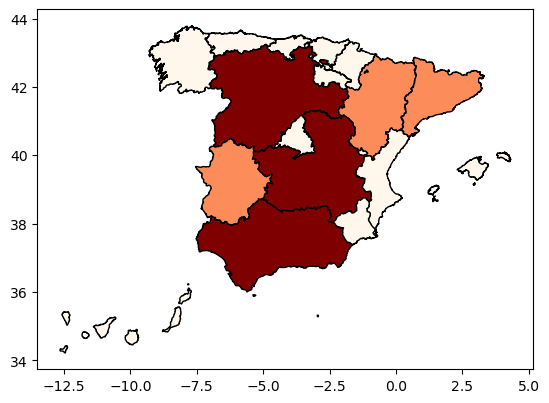

In [23]:
gdf.plot(column='area', scheme='equal_interval', k=3, cmap='OrRd', edgecolor='k') 

O podemos añadir a un gráfico estático también fondos de OpenstreetMap y de otras librerías 

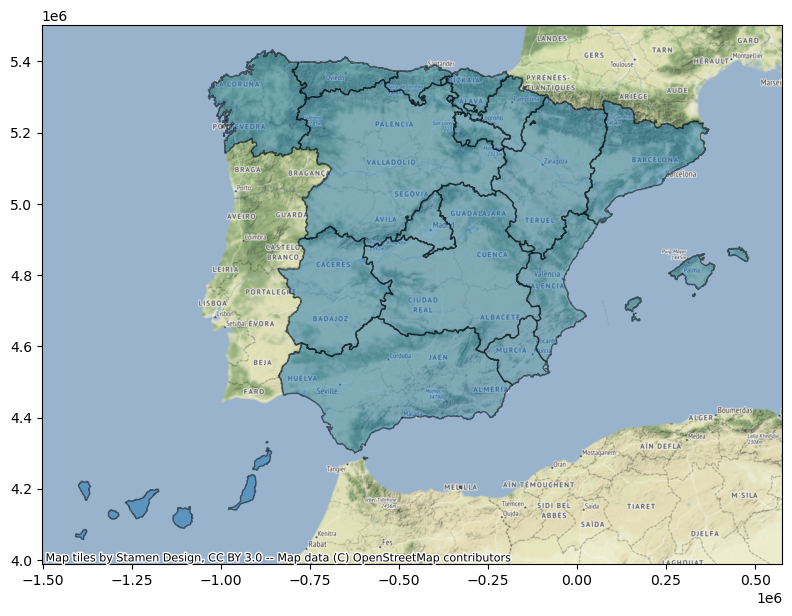

In [24]:
# pip install contextily desde el terminal si fuese necesario
import contextily as cx
# pasamos nuestro mapa al sistema Web Mercator (EPSG 3857)
gdf_wm = gdf.to_crs(epsg=3857)
map=gdf_wm.plot( edgecolor='k', figsize=(10,7), alpha=0.5)
cx.add_basemap(map)

## Importar Metadatos a una Cartografías

Ahora vamos a añadirle datos a cada CCAA


In [25]:
# aquí estoy utilizando la librería Pandas as pd
salarios=pd.read_csv("datos_CCAA/SALARIOS.csv",encoding='latin1',sep=";")
salarios.head()

,COD_CCAA,Nombre CCAA,SALARIO
0,CA01,Andalucía,12.40
1,CA02,Aragón,13.43
2,CA03,"Asturias, Principado de",14.24
3,CA04,"Balears, Illes",11.54
4,CA05,Canarias,11.88


In [26]:
# ahora fusionamos los datos de salarios a la cartografía
gdf=pd.merge(gdf, salarios,how='left', left_on='cod_CCAA', right_on='COD_CCAA')
gdf



,SP_ID,id,cod_CCAA,geometry,area,centroide,distancia,COD_CCAA,Nombre CCAA,SALARIO
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631...",8.922890,POINT (-4.57448 37.46515),3.151160,CA01,Andalucía,12.40
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431...",5.148104,POINT (-0.65864 41.52137),3.224215,CA02,Aragón,13.43
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796...",1.176132,POINT (-5.99206 43.29426),3.606316,CA03,"Asturias, Principado de",14.24
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7...",0.523204,POINT (2.91375 39.57567),6.693294,CA04,"Balears, Illes",11.54
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ...",0.728376,POINT (-10.04040 35.04767),8.348426,CA05,Canarias,11.88
5,CA06,CA06,CA06,"MULTIPOLYGON (((-4.83975 43.18265, -4.83570 43...",0.589368,POINT (-4.02866 43.19940),2.720381,CA06,Cantabria,12.95
6,CA07,CA07,CA07,"MULTIPOLYGON (((-2.92843 42.61309, -2.92825 42...",10.201304,POINT (-4.78068 41.75627),1.649090,CA07,Castilla y León,12.57
7,CA08,CA08,CA08,"MULTIPOLYGON (((-2.05037 41.14872, -2.04629 41...",8.331317,POINT (-3.00339 39.58295),1.158956,CA08,Castilla - La Mancha,12.60
8,CA09,CA09,CA09,"MULTIPOLYGON (((0.66149 42.69284, 0.66601 42.6...",3.479227,POINT (1.53013 41.80045),5.405445,CA09,Cataluña,15.40
9,CA10,CA10,CA10,"MULTIPOLYGON (((0.51654 40.52477, 0.51478 40.5...",2.432325,POINT (-0.55344 39.40330),3.346193,CA10,Comunitat Valenciana,12.83


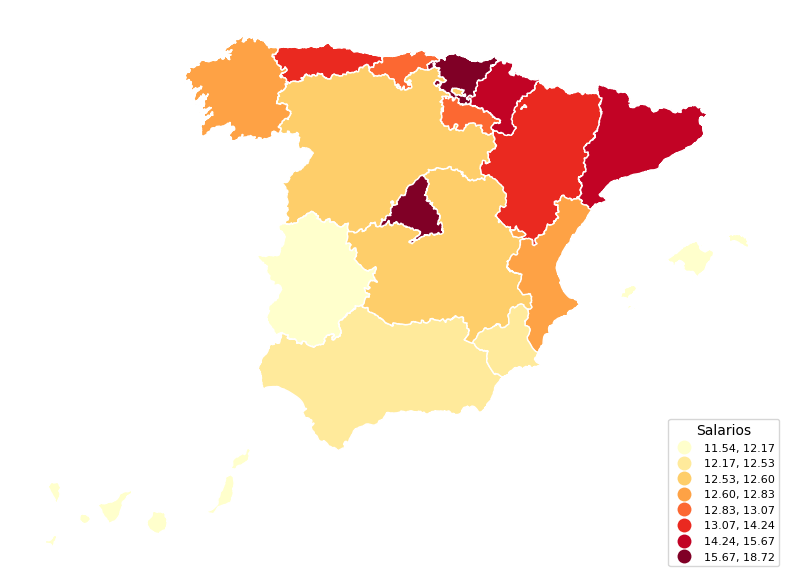

In [27]:

ax=gdf.plot(column='SALARIO', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         edgecolor='w',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Salarios'} 
)
ax.set_axis_off()       


Para terminar voy a grabar la cartografía con todos los campos para no tener que volver a cargarla. Ojo que por ejemplo el formato ESRI 'shp' sólo permite una cartografía

In [28]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SP_ID        19 non-null     object  
 1   id           19 non-null     object  
 2   cod_CCAA     19 non-null     object  
 3   geometry     19 non-null     geometry
 4   area         19 non-null     float64 
 5   centroide    19 non-null     geometry
 6   distancia    19 non-null     float64 
 7   COD_CCAA     17 non-null     object  
 8   Nombre CCAA  17 non-null     object  
 9   SALARIO      17 non-null     float64 
dtypes: float64(3), geometry(2), object(5)
memory usage: 1.6+ KB


In [29]:
gdf["xlong"]=gdf['centroide'].x
gdf["ylat"]=gdf['centroide'].y
gdf=gdf.drop('centroide', axis=1)
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area,distancia,COD_CCAA,Nombre CCAA,SALARIO,xlong,ylat
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631...",8.922890,3.151160,CA01,Andalucía,12.40,-4.574480,37.465152
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431...",5.148104,3.224215,CA02,Aragón,13.43,-0.658642,41.521368
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796...",1.176132,3.606316,CA03,"Asturias, Principado de",14.24,-5.992060,43.294259
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7...",0.523204,6.693294,CA04,"Balears, Illes",11.54,2.913745,39.575672
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ...",0.728376,8.348426,CA05,Canarias,11.88,-10.040403,35.047671


In [30]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SP_ID        19 non-null     object  
 1   id           19 non-null     object  
 2   cod_CCAA     19 non-null     object  
 3   geometry     19 non-null     geometry
 4   area         19 non-null     float64 
 5   distancia    19 non-null     float64 
 6   COD_CCAA     17 non-null     object  
 7   Nombre CCAA  17 non-null     object  
 8   SALARIO      17 non-null     float64 
 9   xlong        19 non-null     float64 
 10  ylat         19 non-null     float64 
dtypes: float64(5), geometry(1), object(5)
memory usage: 1.8+ KB


In [31]:
gdf.to_file('cartografias/CCAA_map.shp', encoding='latin1')

C:\Users\loren\AppData\Local\Temp\ipykernel_6356\3837298736.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('cartografias/CCAA_map.shp', encoding='latin1')


# Mapa de España

Ahora voy a hacer un mapa de España

In [32]:

gdfm =gpd.read_file("cartografias/Munic04_ESP.shp")
gdfm.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8108 entries, 0 to 8107
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SP_ID       8108 non-null   object  
 1   id          8108 non-null   object  
 2   cod_ine     8108 non-null   object  
 3   CODINE_MU   8108 non-null   object  
 4   CCAA        8108 non-null   object  
 5   COD_PROV    8108 non-null   object  
 6   PROV        8108 non-null   object  
 7   MUN         8108 non-null   object  
 8   POB_2016    8108 non-null   float64 
 9   POB_HO      8108 non-null   float64 
 10  POB_MU      8108 non-null   float64 
 11  PARO_TO     8108 non-null   float64 
 12  POB16_64    8108 non-null   float64 
 13  TASA_PARO   8108 non-null   float64 
 14  RENTPCAP07  8108 non-null   float64 
 15  PrecioIn16  8108 non-null   float64 
 16  geometry    8108 non-null   geometry
dtypes: float64(8), geometry(1), object(8)
memory usage: 1.1+ MB


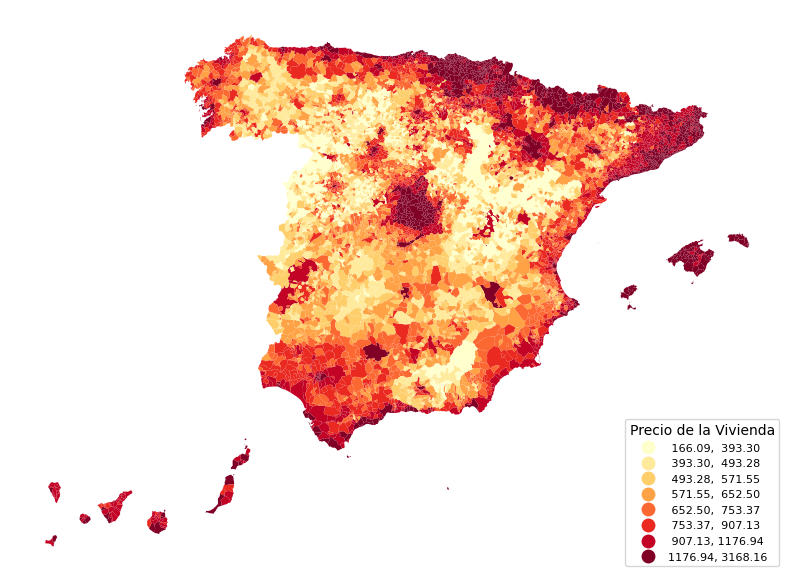

In [33]:
map=gdfm.plot(column='PrecioIn16', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Precio de la Vivienda'} 
)
map.set_axis_off()       


Puedo intentar ponerle encima cartografía de comunidades autónomas o provincias. Primero voy a crear la cartografía de las provincias agregando municipios (features) utilizando la función `dissolve()` de `GeoPandas`

<AxesSubplot: >

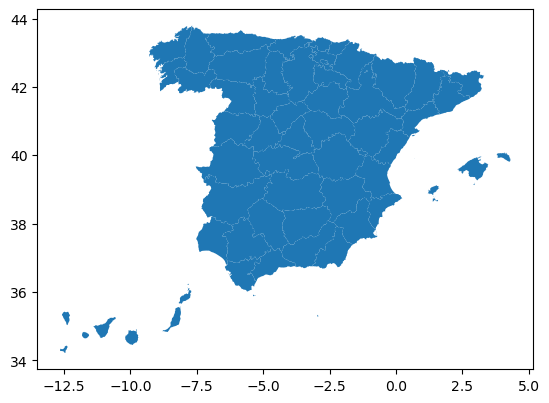

In [34]:
gprov=gdfm.dissolve(by="COD_PROV")
gprov.plot() 
   

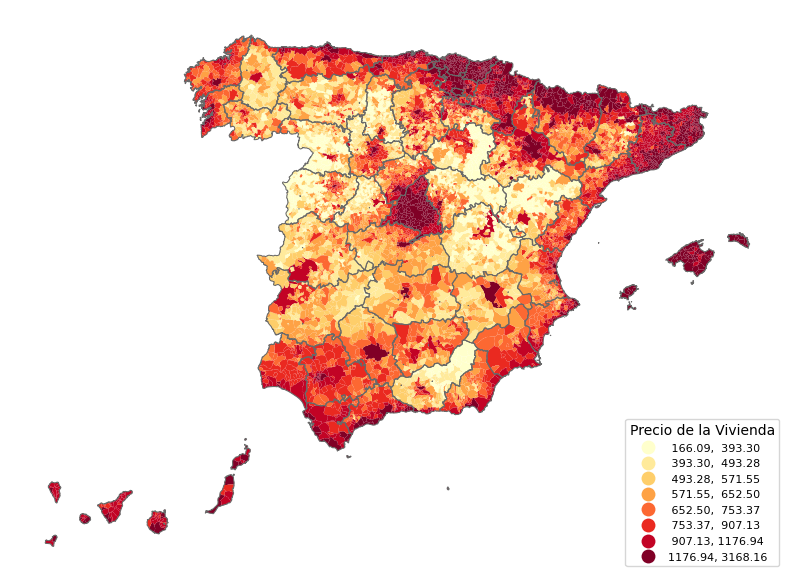

In [35]:
map=gdfm.plot(column='PrecioIn16', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Precio de la Vivienda'} 
)
map=gprov.boundary.plot(ax=map,color="dimgray", linewidth=.75)
map.set_axis_off()  

## Extensiones

Hay un gran número de paquetes y de utilidades para trabajar con datos espaciales. Por ejemplo:
- para poder representar puntos en un mapa es necesario tner la geolocalizaciópn de los puntos utilizando por ejemplo las direcciones postales. La función de `GeoPandas` **`tools.geocode()`** sirve para geolocalizar direcciones. También la librería **`geocoder`** hace lo mismo     
    
- La librería **`contextily`** sirve para añadir mapas contextuales OpenStreetMap a los gráficos de `GeoPandas`

- La librería **`osmnx`** sirve para interactuar con la api de Openstreetmap

- La librería **`Folium`** sirve para crear mapas web con Leaflet

- La librería **`Shapely`** para gestionar cartografías

